# End to End Machine Learning With Deployment

### Part1- EDA of the Medical Dataset
1. Import the libraries
2. Load and View the data
3. Clean the data
4. Complete EDA of the data ( depoloy a EDA page in streamlit) 

### Part2-Modelling of the data set
5. Preprocessing for modelling
6. Fit and Evaluate various models
7. OPtimize the chosen model
8. Interpret the model
9. Create a pipeline for the model
10. Pickle the model 
11. Deploy the model in streamlit 

### Step1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

#libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report

# import libraries for deployment
import streamlit as st

# import libraries for deployment
import streamlit as st
print("All needed libraries are imported")

All needed libraries are imported


In [2]:
#!pip install imbalanced-learn

In [3]:
#!pip install ngboost

In [4]:
#!pip install streamlit

### Step2. Load and View the data

In [5]:
data=pd.read_csv('data.csv')
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [6]:
data.shape

(768, 10)

In [7]:
data.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [8]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [12]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

**Observations**
1. Data has 768 rows and 10 columns 
2. The first column is 'Unnamed: 0' which is redundant
3. All columns are numerical except the Outcome 
4. There are no nulls in the data 
5. However there are nulls present as 0's
6. There are no duplicates or corrupt characters


### Step 3. Clean the data

In [13]:
# remove the redundant columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No


In [15]:
zerofill=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofill, axis=0)

In [16]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [17]:
d={'Yes':1, 'No':0}
df=data.copy()
df['Outcome']=df['Outcome'].map(d)

In [18]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step4. Complete EDA of the data ( depoloy a EDA page in streamlit) 

**Univariate Analysis**
1. Numericals -histograms and boxplots 
2. Categorical- barcharts 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

**Corralations**
1. Correlation Matrix
2. Heatmap

**Univariate Analysis**

In [19]:
def histograms(data):
    print('Histograms')
    data.hist()
    plt.tight_layout()
    plt.show()

Histograms


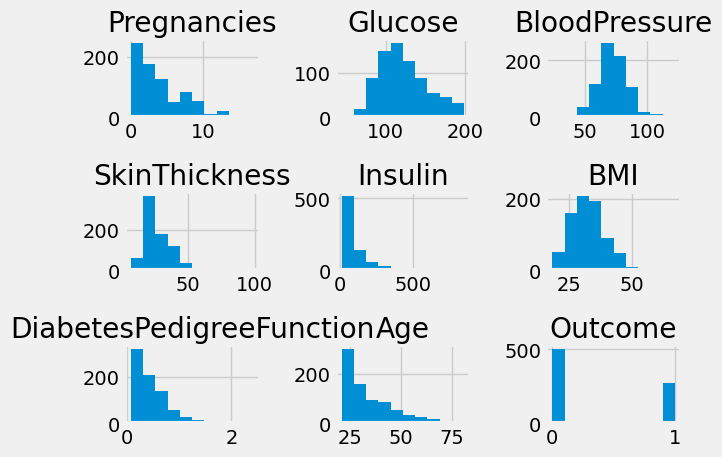

In [20]:

histograms(df)

In [21]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print("Boxplot and Histplot for ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25, 0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x=feature, showmeans=True, color='orange', ax=ax_box)
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='green') if bins else sns.\
                         histplot(data=data, x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

Boxplot and Histplot for  Pregnancies


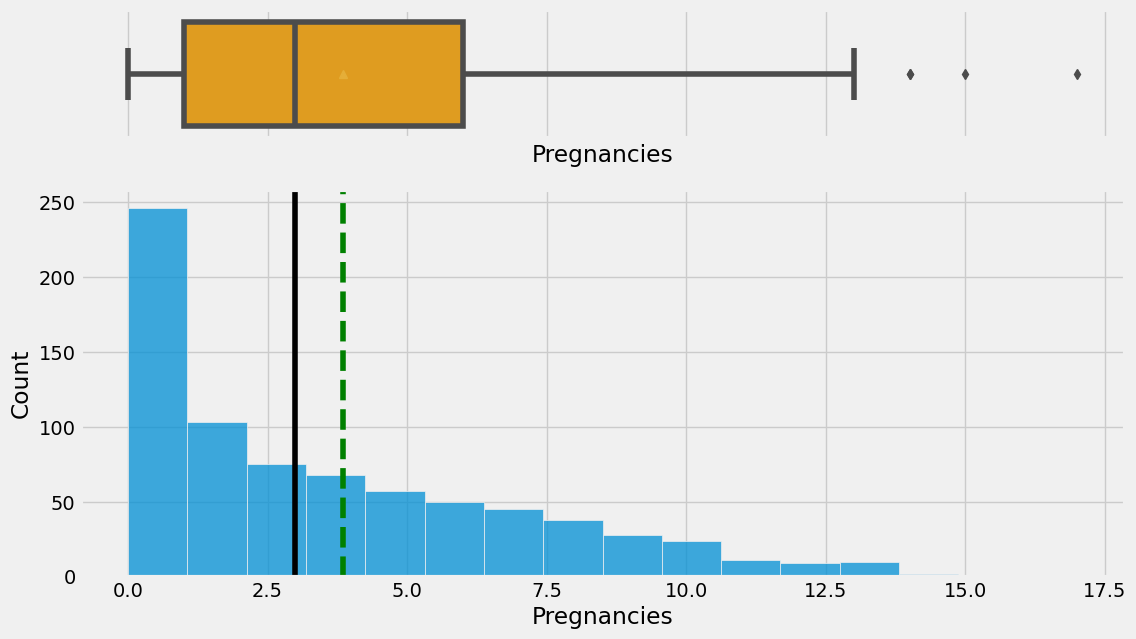

Boxplot and Histplot for  Glucose


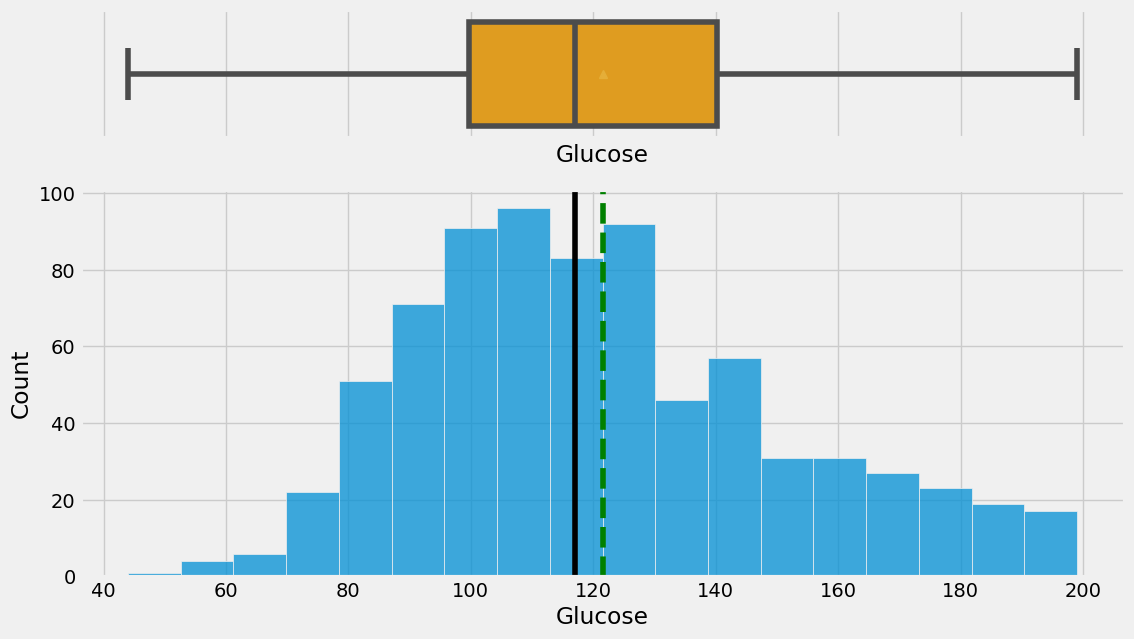

Boxplot and Histplot for  BloodPressure


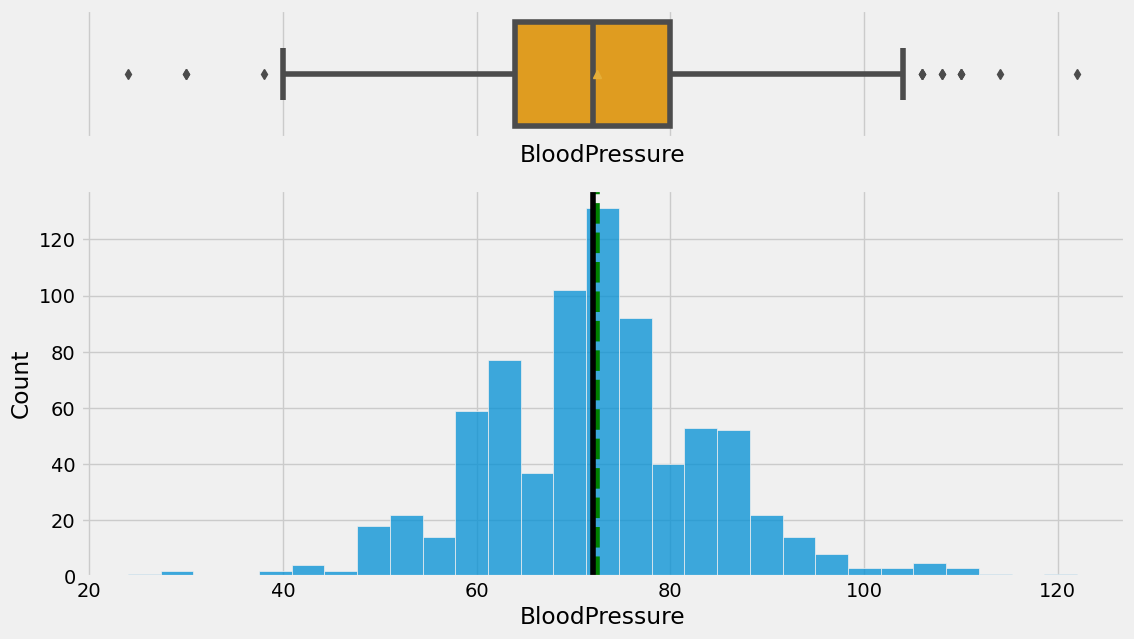

Boxplot and Histplot for  SkinThickness


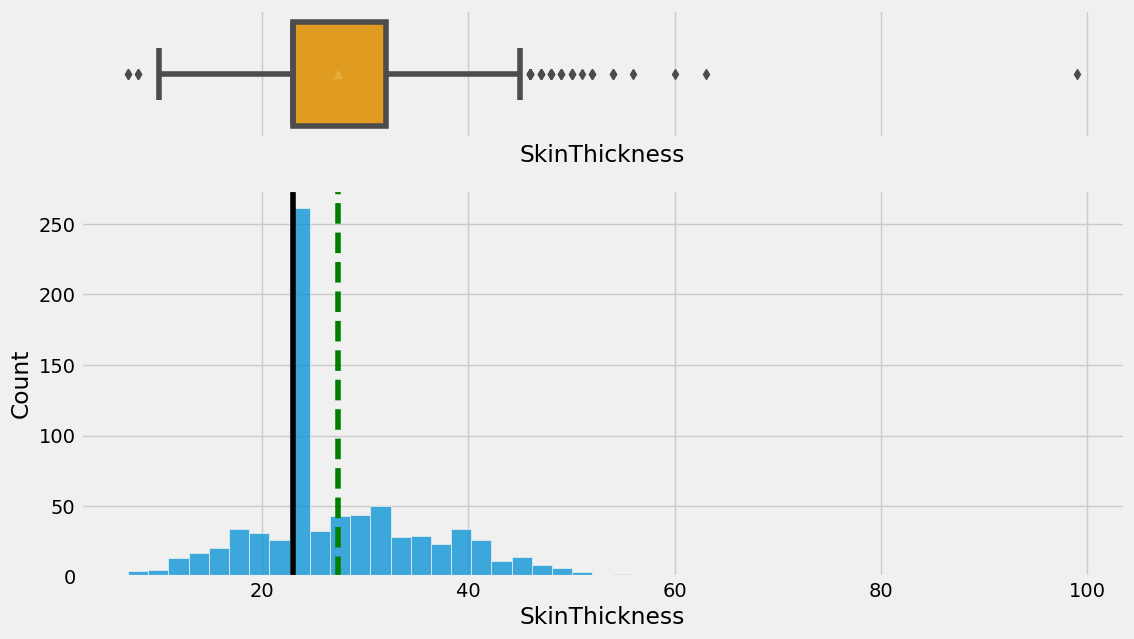

Boxplot and Histplot for  Insulin


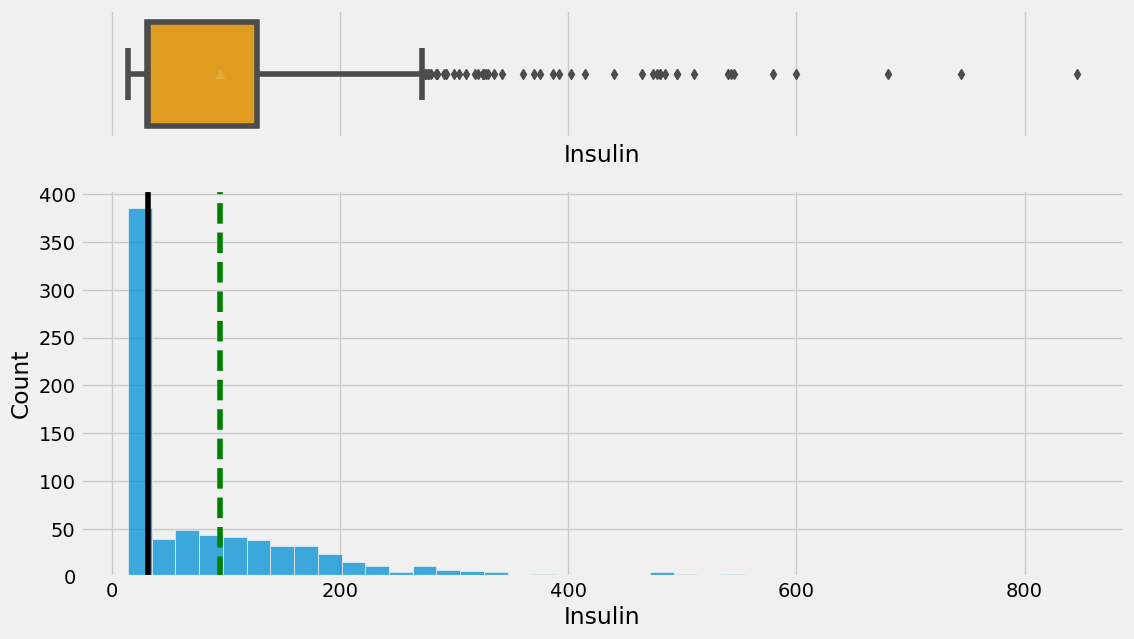

Boxplot and Histplot for  BMI


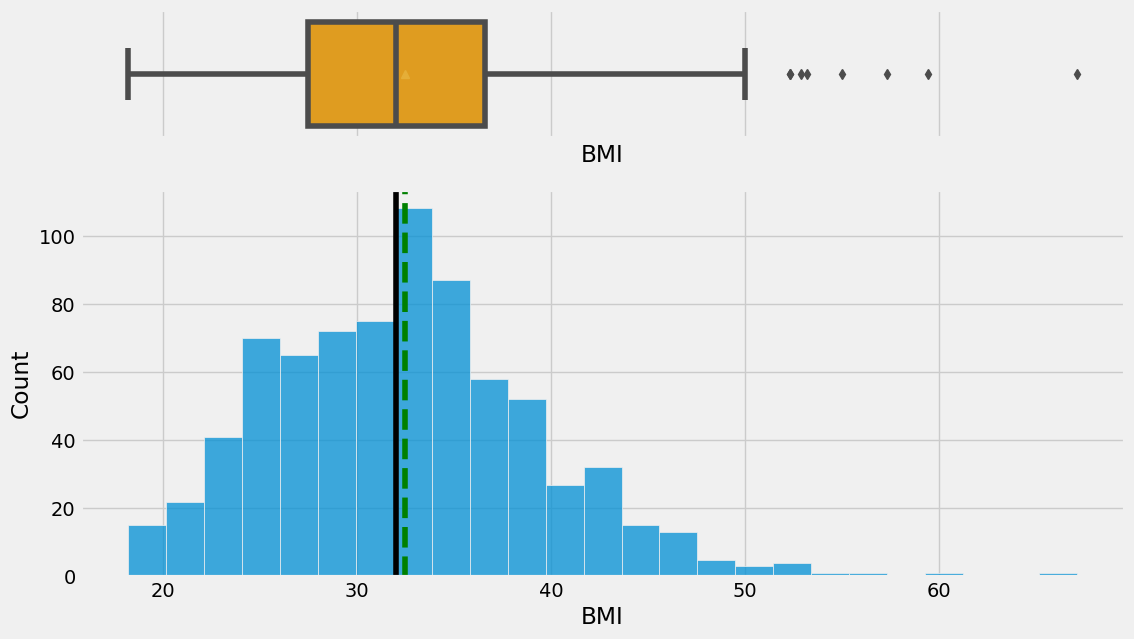

Boxplot and Histplot for  DiabetesPedigreeFunction


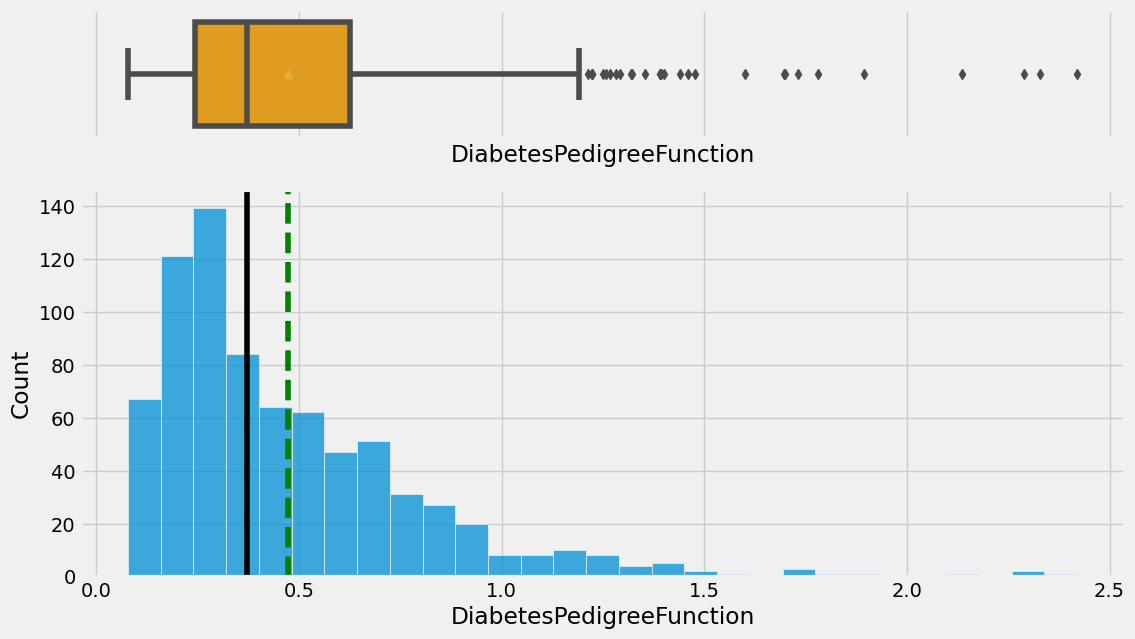

Boxplot and Histplot for  Age


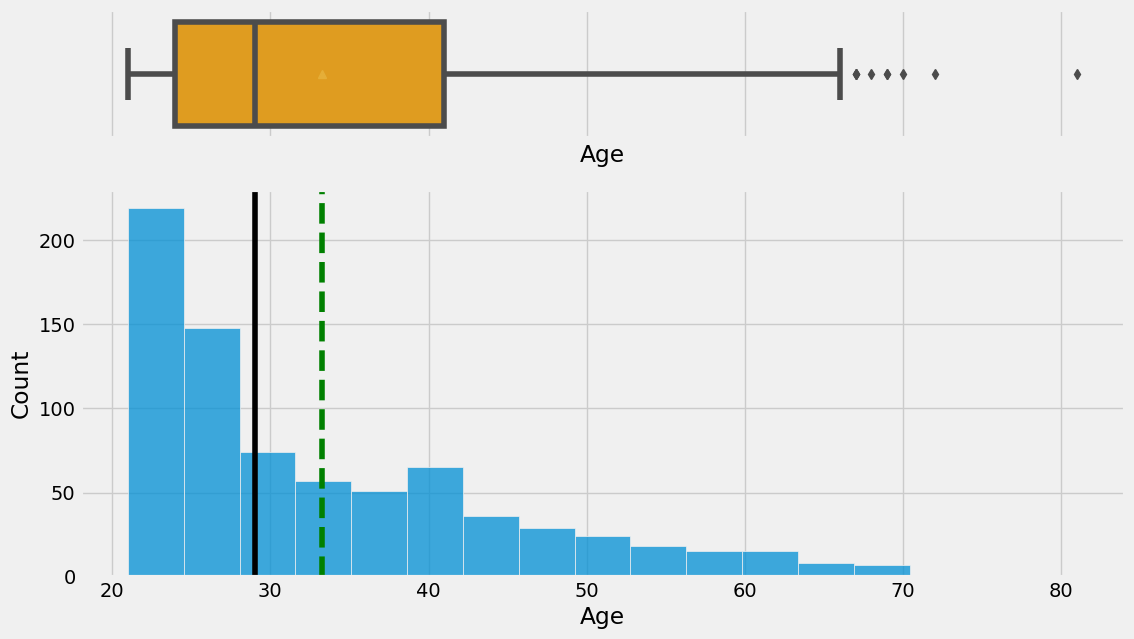

In [22]:
for col in data.select_dtypes(exclude='O').columns:
    boxplot_histplot(data=data, feature=col, bins=None, figsize=(12,7))

In [23]:
def barchart(data, feature):
    print("Univariate Countplot of ", feature)
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Univariate Countplot of  Outcome


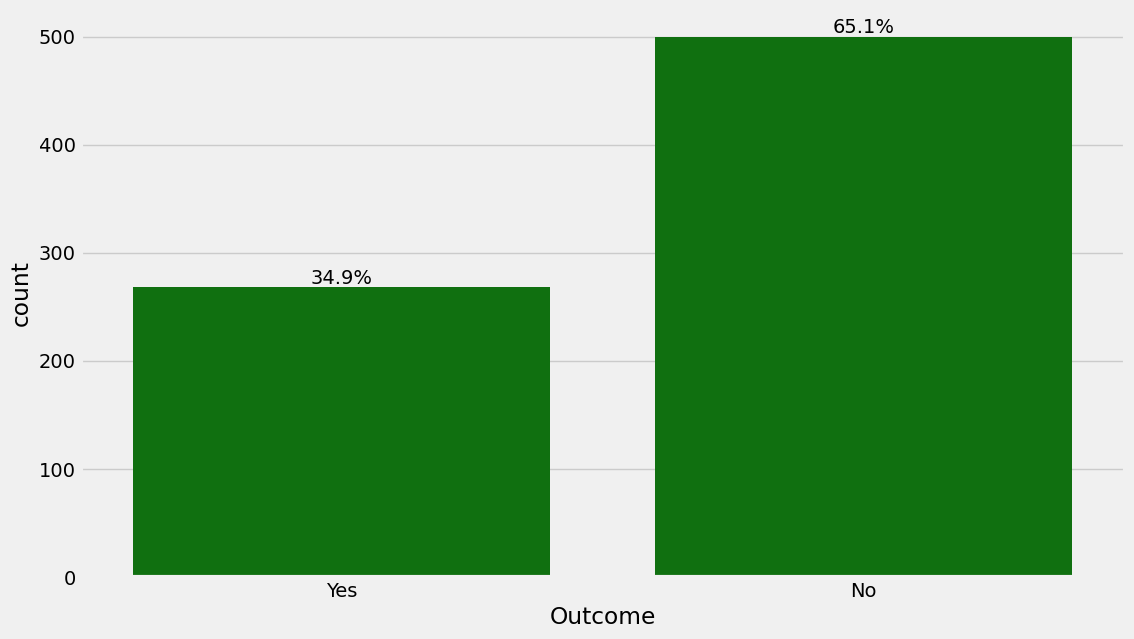

In [24]:
barchart(data=data, feature='Outcome')

**Observations**
1. Insulin . DPF and Age are highly right skewed and having heavy amoiunt of outliers ( we may need to do data transformation like log) 
2. Age and Pregnancies are also right skewed with some extreme values which may be legit ( need to consukt with domain experts)
3. Outcome variable is highly imbalanced(Yes:No = 1:2) , we need to solve for data imbalance before modelling
4. Missing values have been taken care of
5. Label Encoding is done 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

In [25]:
def catnum(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.ylabel(col)
    plt.show()
    

Bivariate Barchart between Outcome and Pregnancies


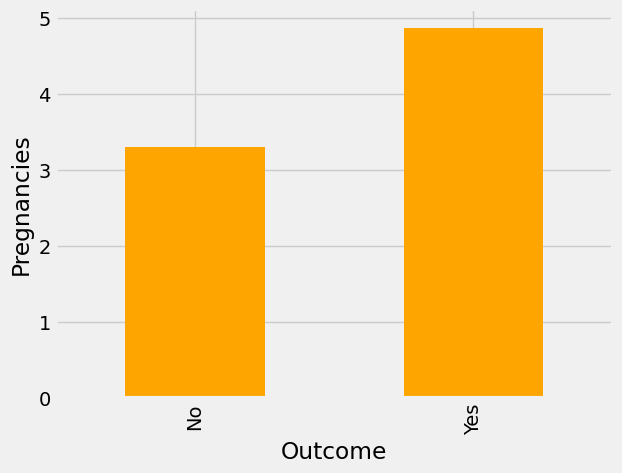

Bivariate Barchart between Outcome and Glucose


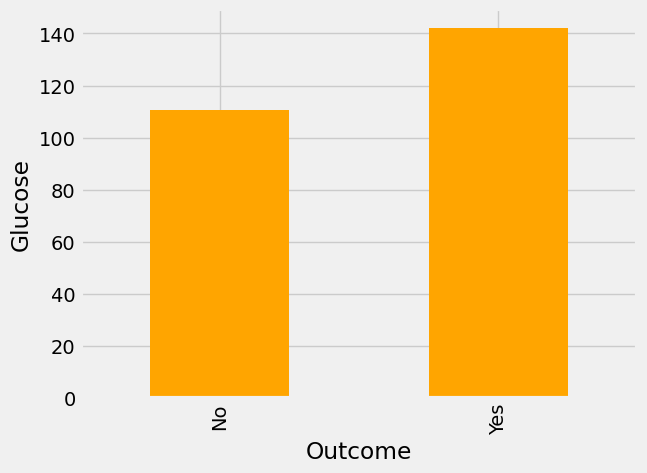

Bivariate Barchart between Outcome and BloodPressure


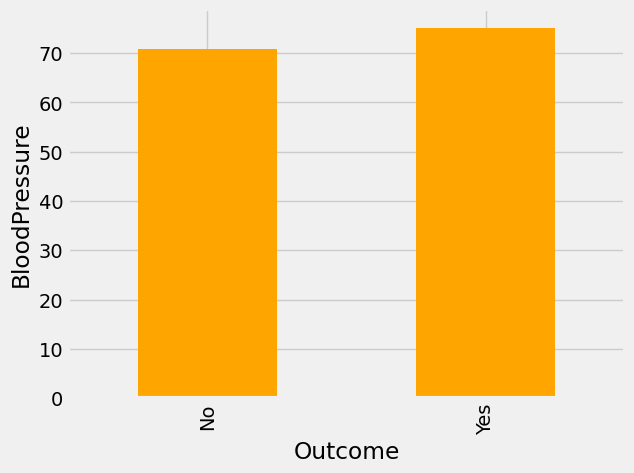

Bivariate Barchart between Outcome and SkinThickness


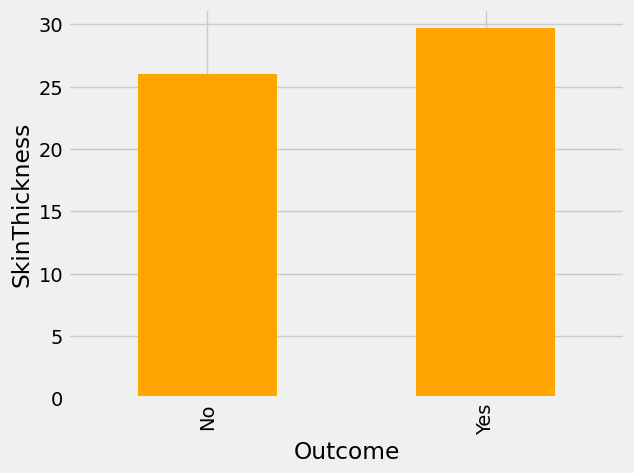

Bivariate Barchart between Outcome and Insulin


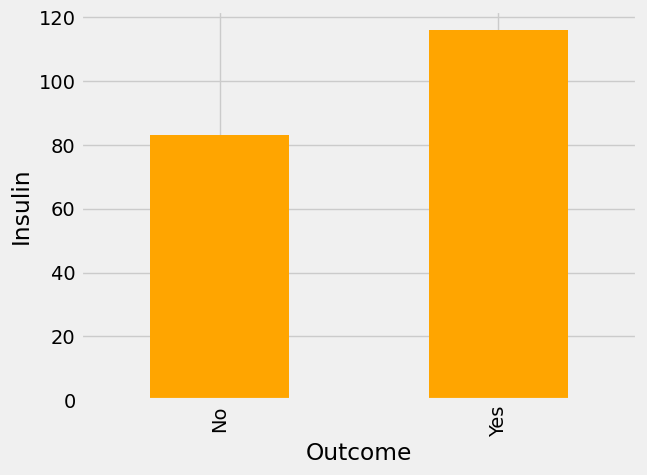

Bivariate Barchart between Outcome and BMI


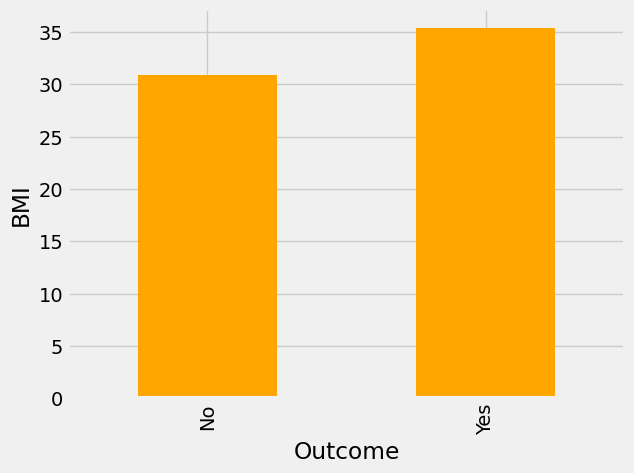

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


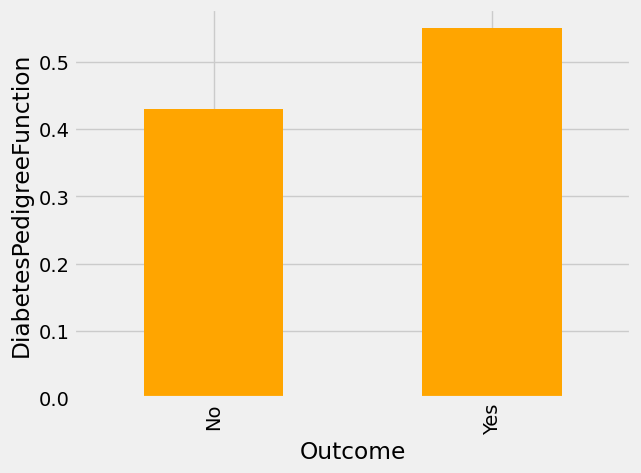

Bivariate Barchart between Outcome and Age


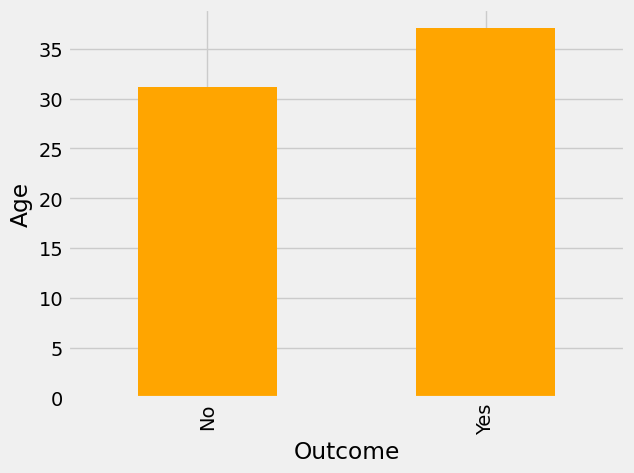

In [26]:
for col in data.select_dtypes(exclude='O').columns:
    catnum(data=data, feature1='Outcome', feature2=col)

In [27]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariate Charts for {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot between features')
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='orange')
    plt.title('Scatterplot between features')
    plt.show()
    

Bivariate Charts for Glucose and Pregnancies


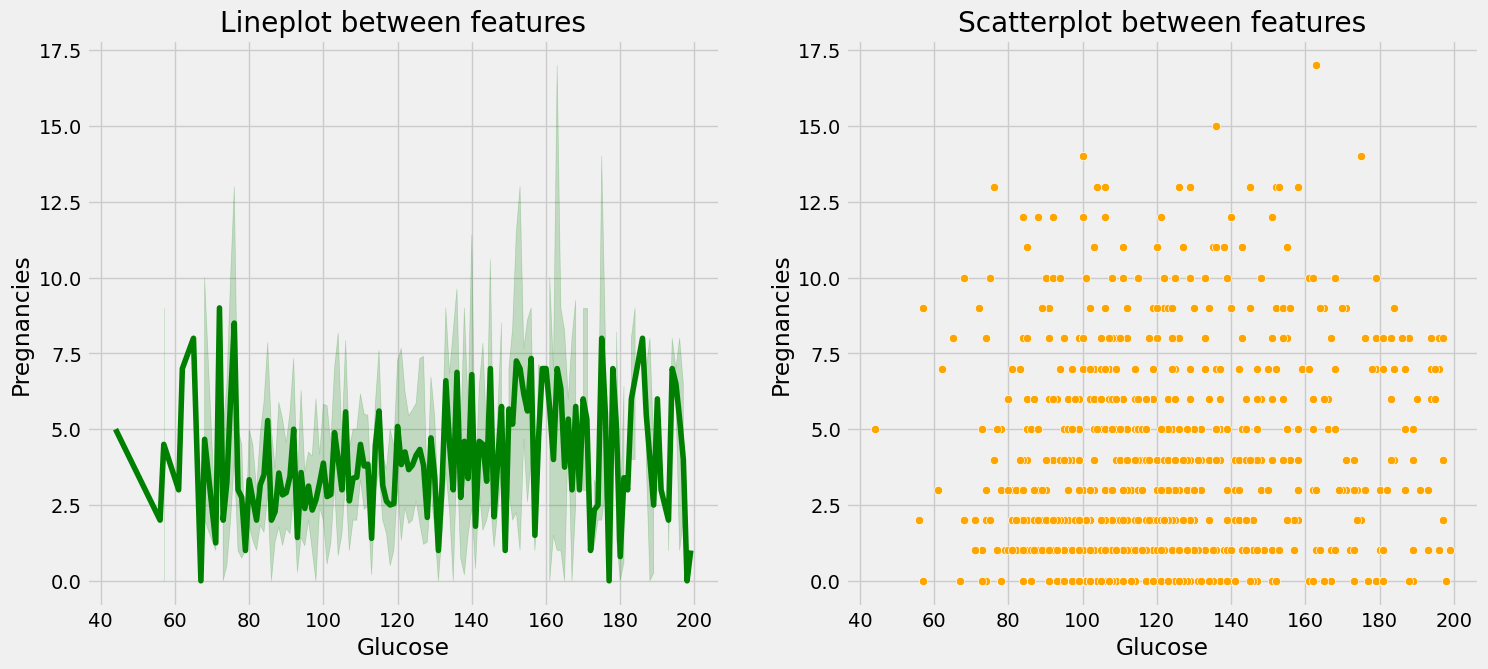

Bivariate Charts for Glucose and Glucose


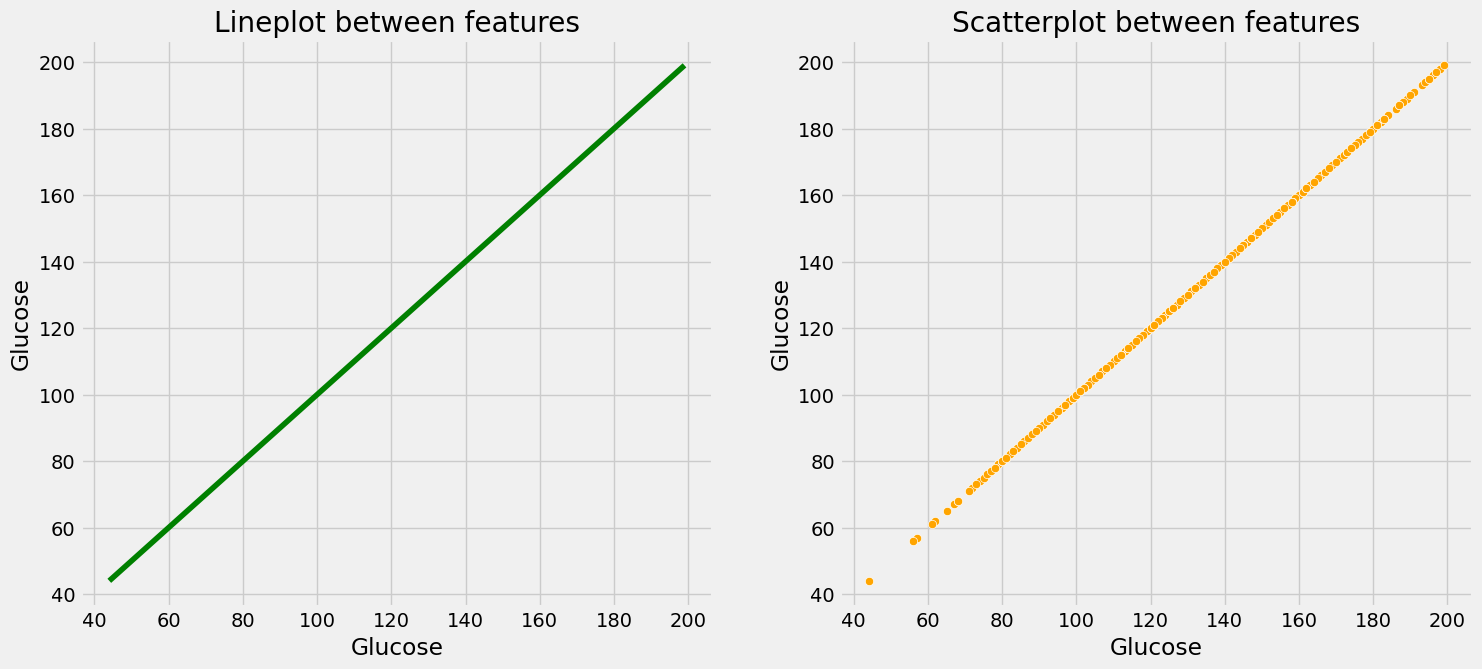

Bivariate Charts for Glucose and BloodPressure


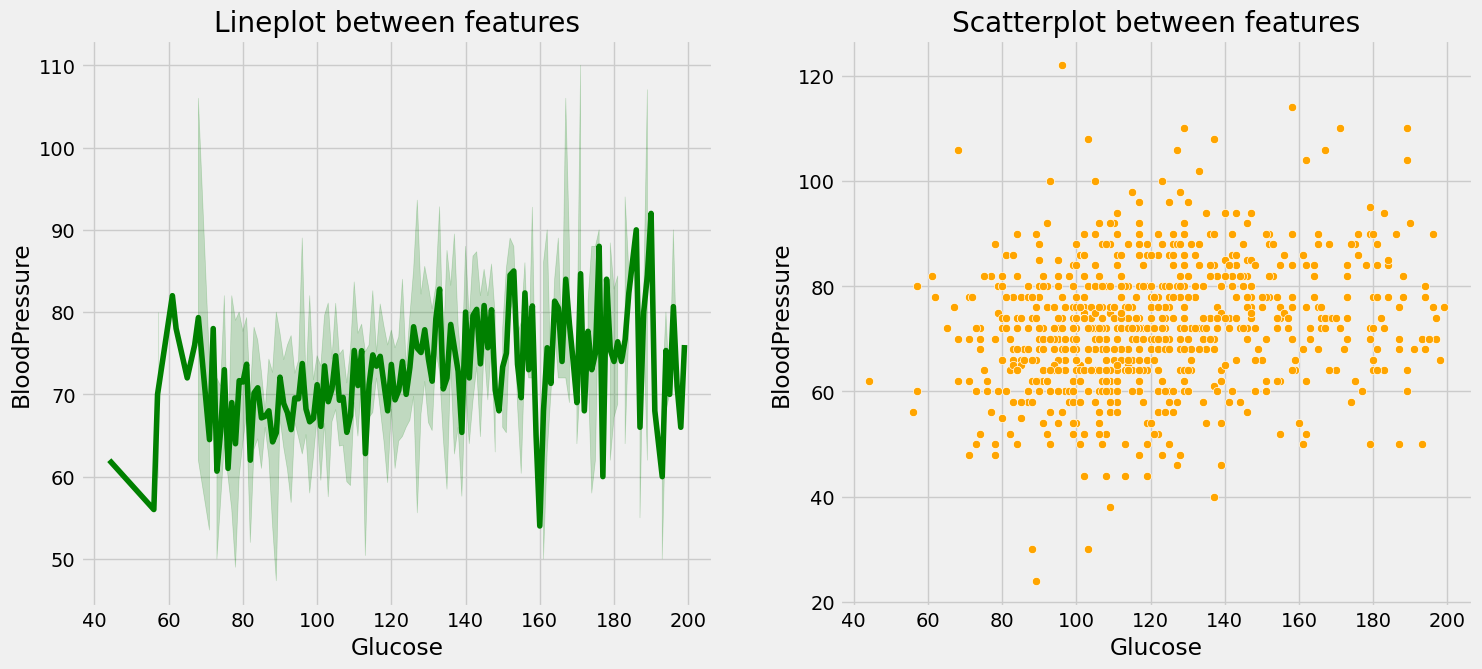

Bivariate Charts for Glucose and SkinThickness


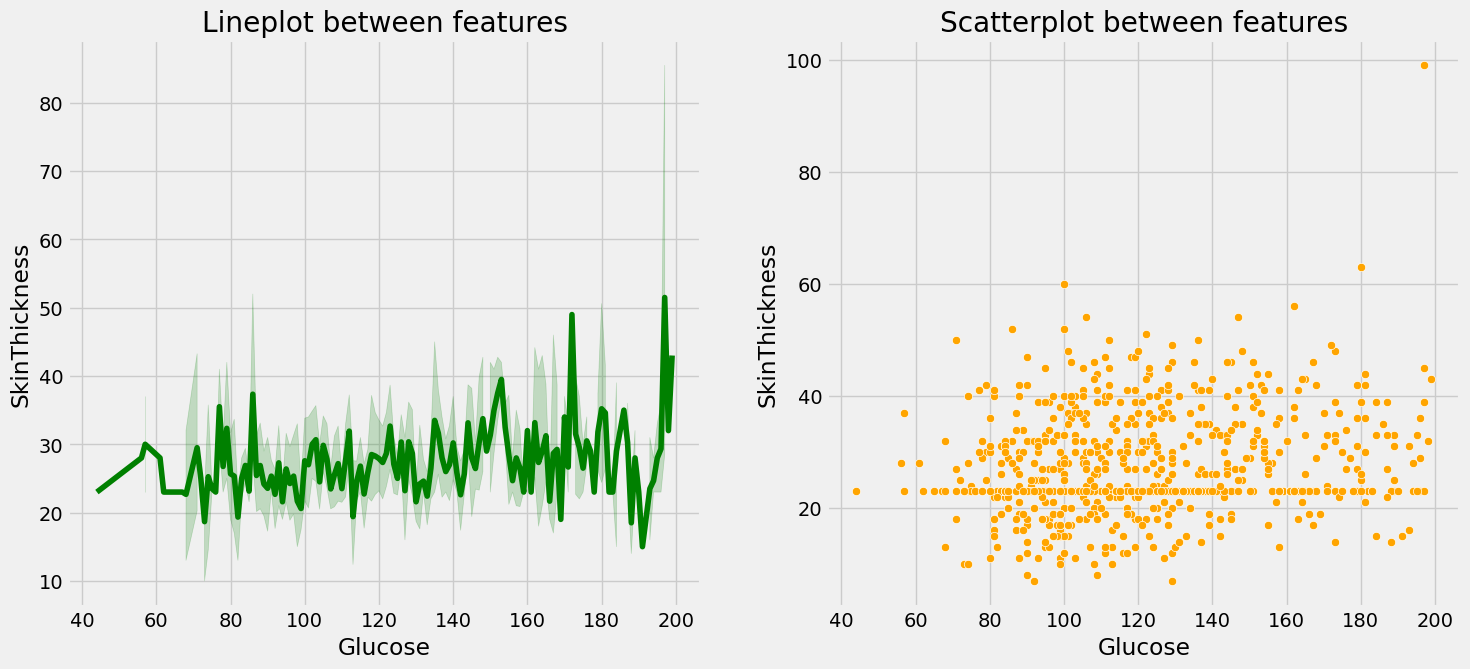

Bivariate Charts for Glucose and Insulin


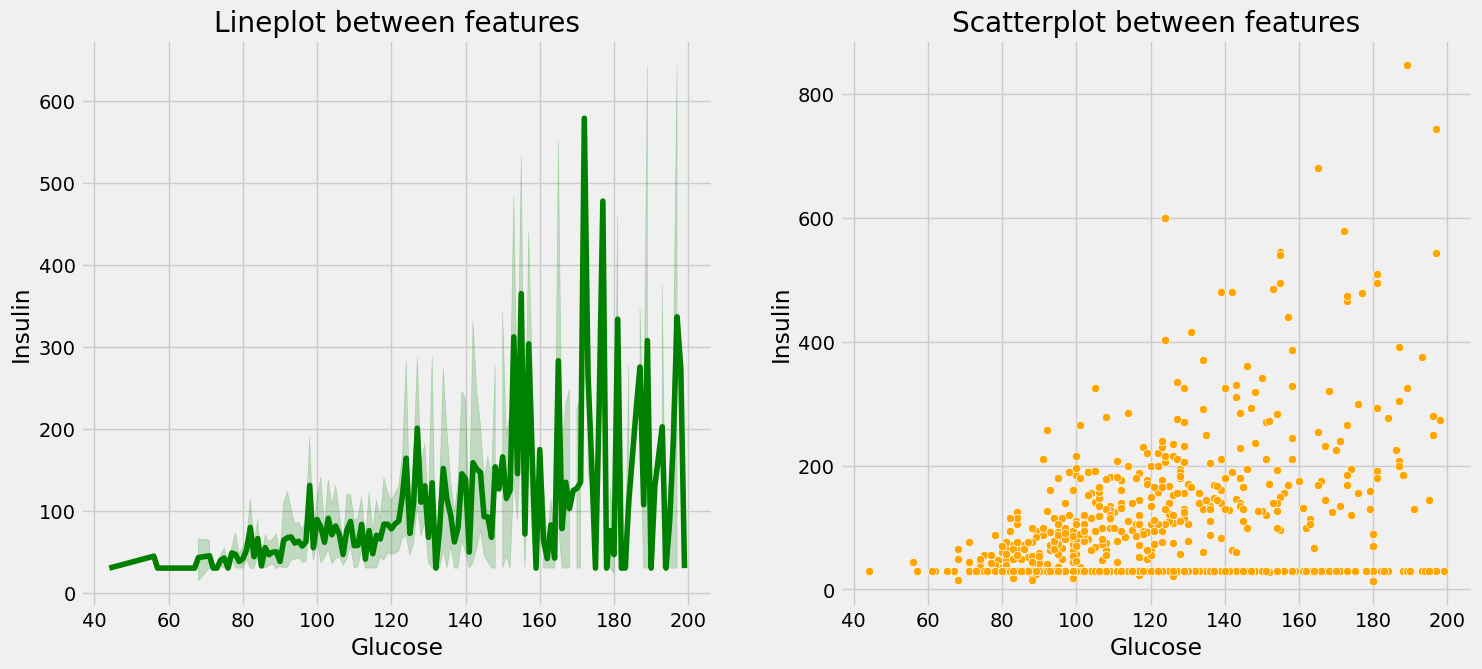

Bivariate Charts for Glucose and BMI


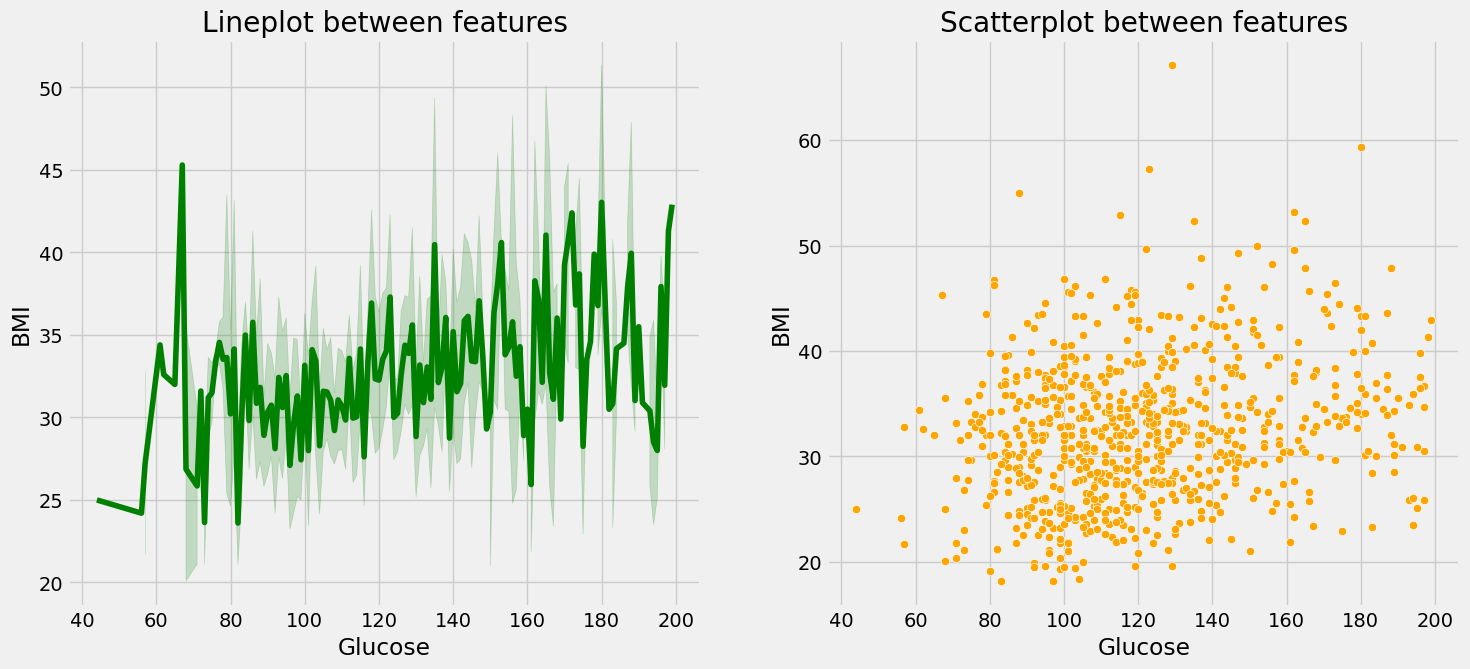

Bivariate Charts for Glucose and DiabetesPedigreeFunction


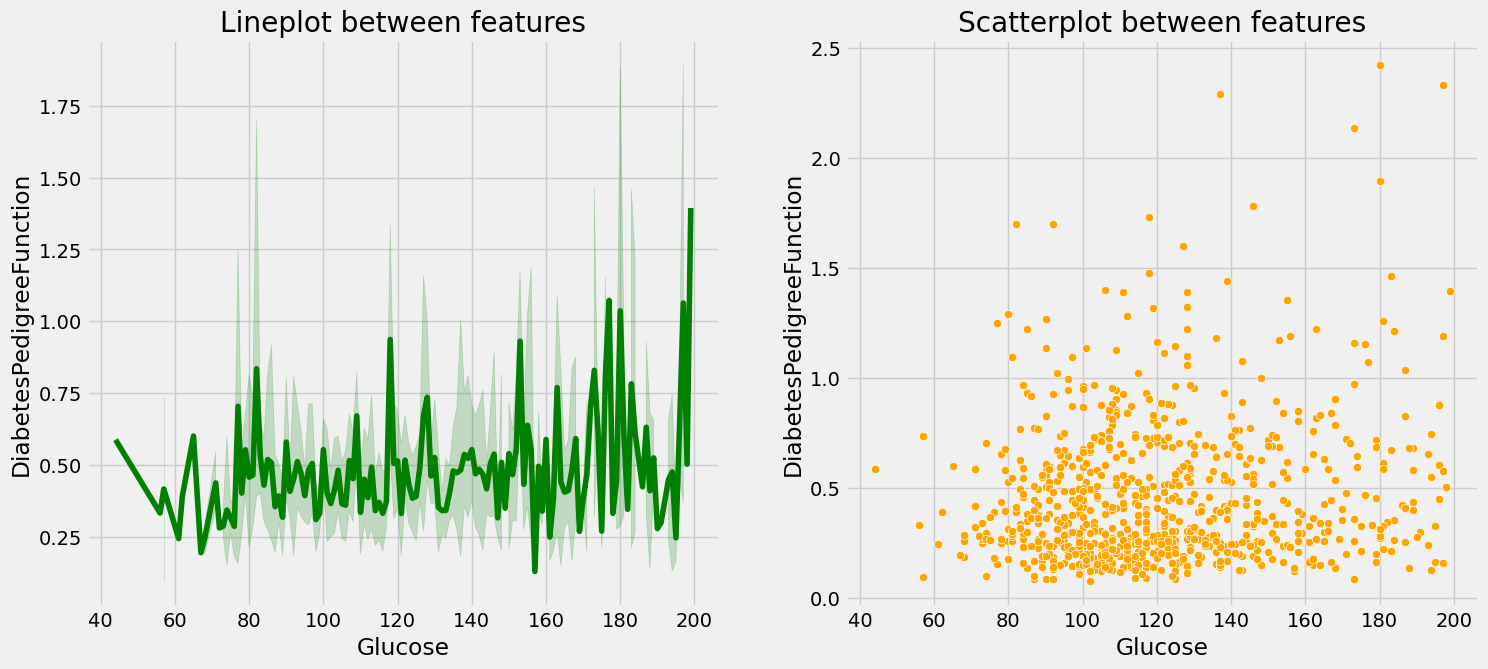

Bivariate Charts for Glucose and Age


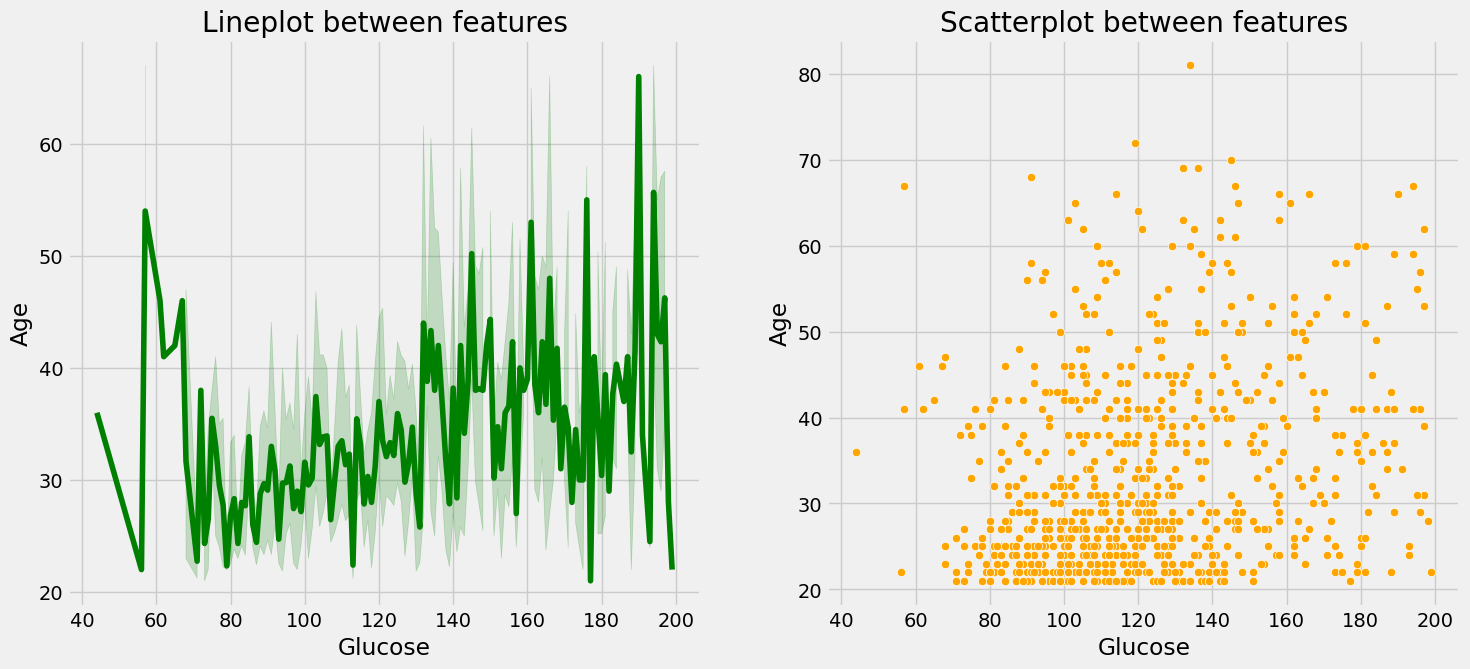

Bivariate Charts for Glucose and Outcome


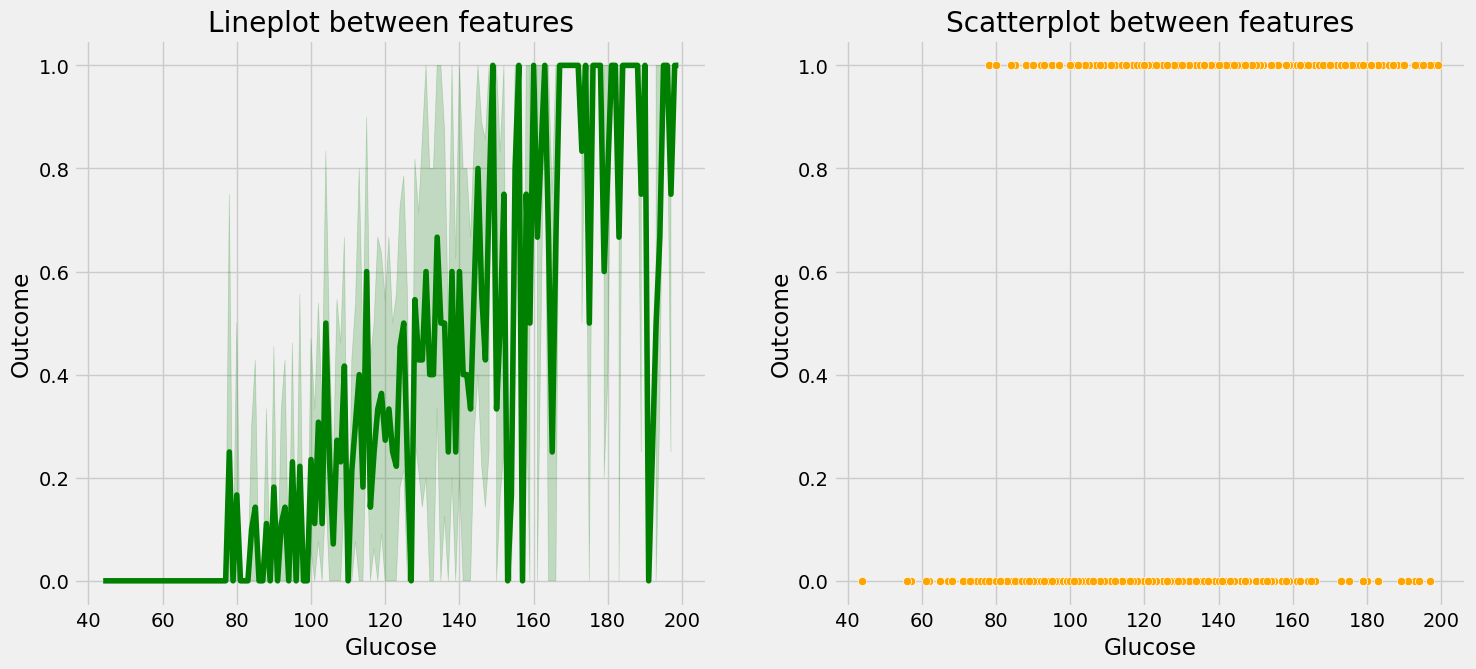

In [28]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df, feature1='Glucose', feature2=col)

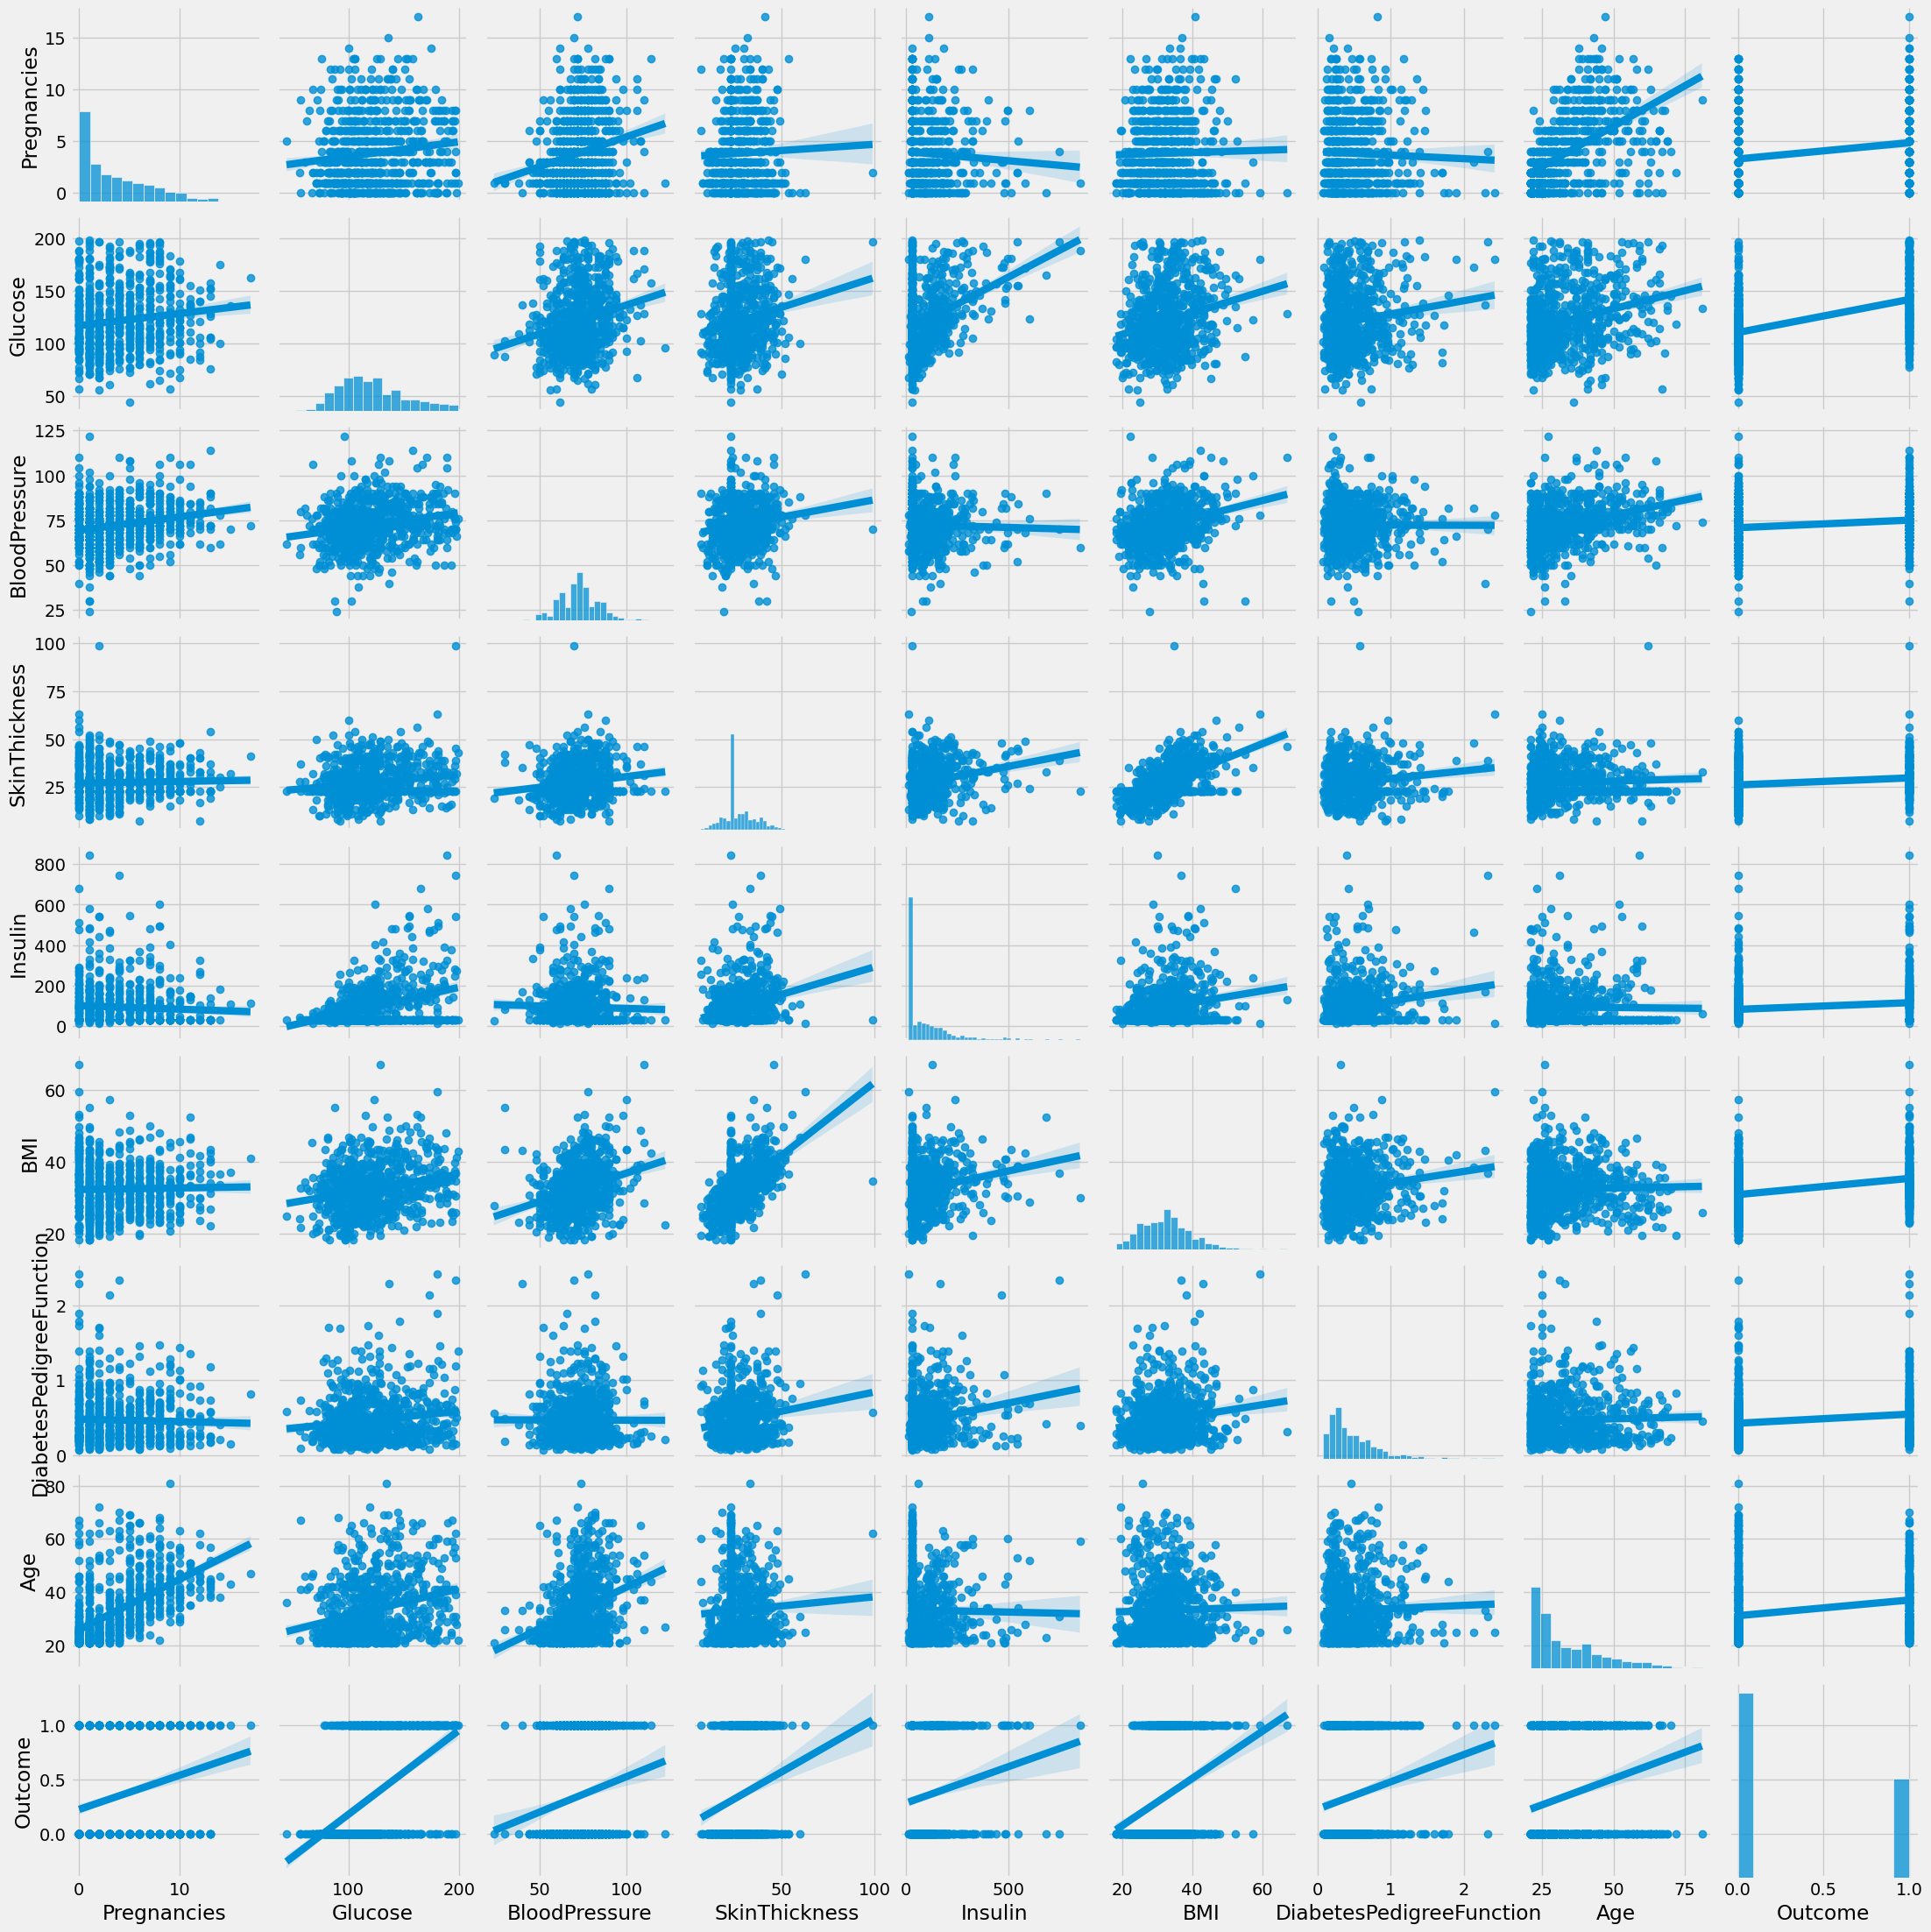

In [29]:
sns.pairplot(df, kind='reg')

**Corralations**
1. Correlation Matrix
2. Heatmap

In [30]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [31]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

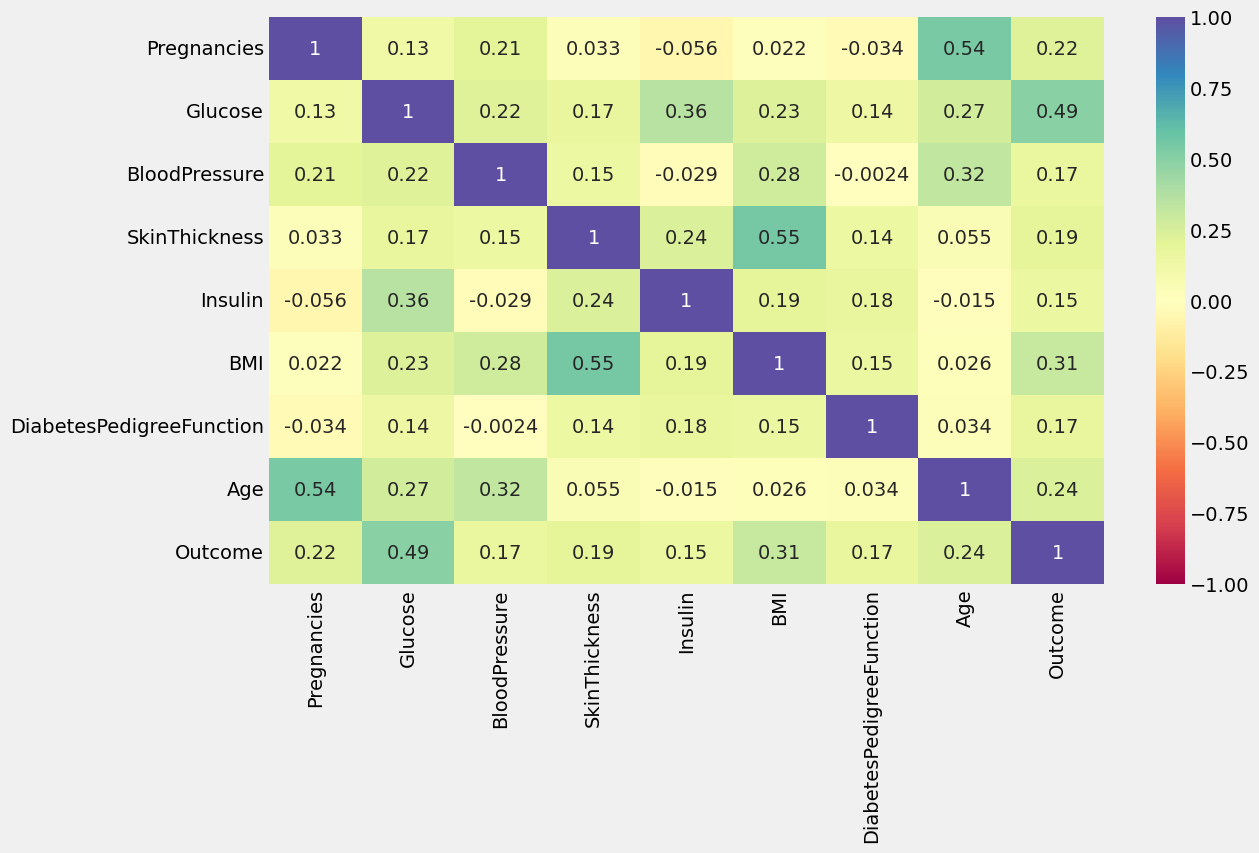

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=+1)

**Observations of Bivariate Analysis**
1. Women with higher Pregnancies, Glucose, DPF, Insulin are more likely to be diabetic
2. Glucose and Insulin, BMI and SkinThickness appear to have hiugh multicollinearity
3. Glucose, BMI appear to be strongest predictors of Diabetes

### App for EDA 

In [33]:
#!pip install streamlit

In [34]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

### Step2. Load and View the data

data=pd.read_csv('data.csv')
st.subheader('Data View')
st.write(data.head())

st.subheader('Descriptives')
st.write(data.describe().T)

data.hist()
st.subheader('Histograms')
plt.tight_layout()
st.pyplot()

Overwriting eda.py


# End of Part 1

### Step 5:Data Preprocessing
1. Seperate the Features and label
2. Null value imputation
3. label Encoding
4. Data Imbalance Solving
5. Train Test split
6. Feature Scaling

In [35]:
def preprocess(data,label):
    X=data.drop(label,axis=1)
    y=data[label]
    sm = SMOTE()
    X, y = sm.fit_resample(X,y)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    return X_train,X_test,y_train,y_test

In [36]:
X_train,X_test,y_train,y_test=preprocess(df,'Outcome')

In [37]:
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

### Step 6: Fit and Evalute Models

In [38]:
def print_metrics(y_test,y_pred,model_name):
    print('The results of model',model_name)
    print('')
    print('accuracy_score',accuracy_score(y_test,y_pred))
    print(' ')
    print('recall_score',recall_score(y_test,y_pred))
    print(' ')
    print('precision_score',precision_score(y_test,y_pred))
    print(' ')
    print('f1_score',f1_score(y_test,y_pred))
    print(' ')

In [39]:
def plot_metrics(clf,x_test,y_test,model_name):
    plot_confusion_matrix(clf,x_test,y_test,display_labels=[0,1])
    print('')
    plot_roc_curve(clf,x_test,y_test)
    print('')
    plot_precision_recall_curve(clf,x_test,y_test)

In [40]:
y=df['Outcome']
y.value_counts()
X=df.drop('Outcome',axis=1)

In [41]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [42]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [43]:
#fit the Knn Model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_pred, y_test, 'KNN')

The results of model KNN

accuracy_score 0.77
 
recall_score 0.72
 
precision_score 0.8910891089108911
 
f1_score 0.7964601769911505
 


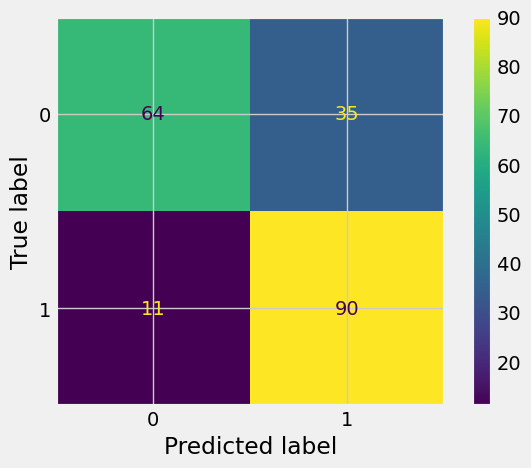

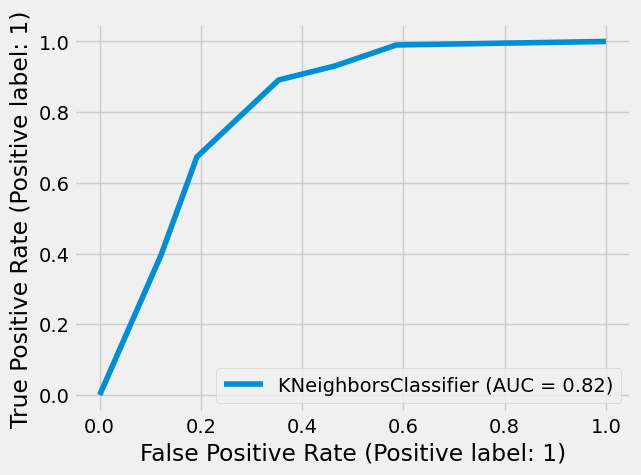

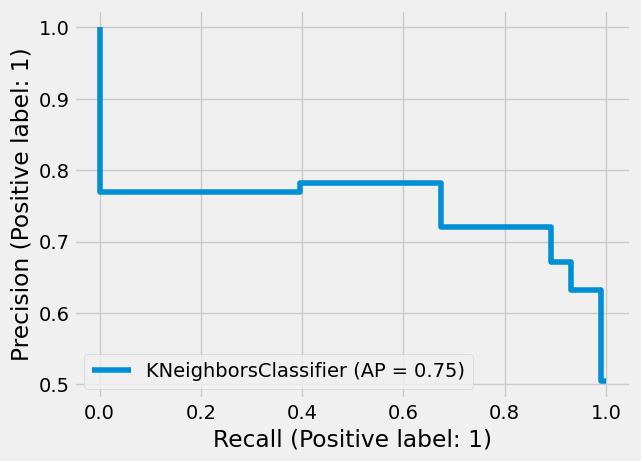

In [44]:
plot_metrics(knn,x_test,y_test,'KNN')

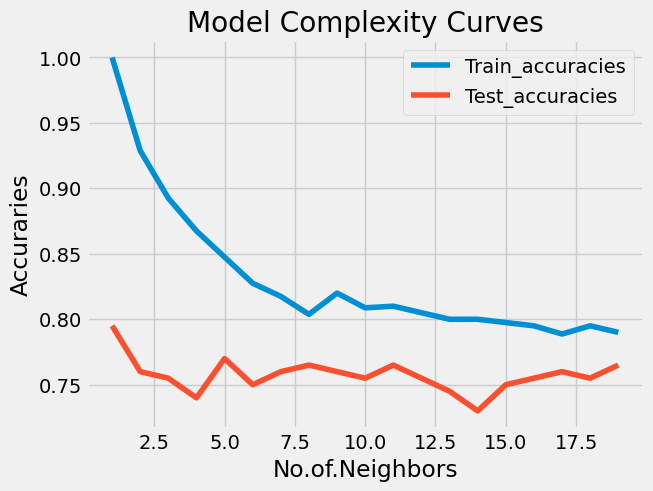

In [45]:
# optimize k
neighbors = np.arange(1,20)
train_accuracies = np.empty(len(neighbors))
test_accuracies = np.empty(len(neighbors))

for i, k  in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracies[i]=knn.score(x_train, y_train)
    test_accuracies[i]=knn.score(x_test, y_test)
    
    
plt.plot(neighbors, train_accuracies, label='Train_accuracies')
plt.plot(neighbors, test_accuracies, label='Test_accuracies')
plt.legend()
plt.title("Model Complexity Curves")
plt.xlabel("No.of.Neighbors")
plt.ylabel("Accuraries")
plt.show()

In [46]:
# Again fitting a model the Knn Model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_pred, y_test, 'KNN')

The results of model KNN

accuracy_score 0.77
 
recall_score 0.72
 
precision_score 0.8910891089108911
 
f1_score 0.7964601769911505
 


In [47]:
#fit and evaluate all the model and chose the best to display
clfs={
    'LogisticRegression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'N':KNeighborsClassifier(),
    'DecissionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GredientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier(),
    'SVM':SVC()
}

#creating an empty datAFRAME OF MATRICS
models_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1_score'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    print('Fitting Classifier ....',clf_name)
    y_pred=clf.predict(x_test)
    t=pd.Series({
        'model_name':clf_name,
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'f1_score':f1_score(y_test,y_pred)
    })
    models_report = models_report.append(t, ignore_index=True)
    
models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report

Fitting Classifier .... LogisticRegression
Fitting Classifier .... Naive Bayes
Fitting Classifier .... N
Fitting Classifier .... DecissionTree
Fitting Classifier .... RandomForest
Fitting Classifier .... AdaBoost
Fitting Classifier .... GredientBoosting
Fitting Classifier .... XGBoost
Fitting Classifier .... SVM


,model_name,accuracy,recall,precision,f1_score
4,RandomForest,0.800,0.871287,0.765217,0.814815
6,GredientBoosting,0.800,0.841584,0.779817,0.809524
8,SVM,0.790,0.841584,0.765766,0.801887
2,N,0.770,0.891089,0.720000,0.796460
7,XGBoost,0.765,0.821782,0.741071,0.779343
5,AdaBoost,0.765,0.792079,0.754717,0.772947
3,DecissionTree,0.755,0.792079,0.740741,0.765550
1,Naive Bayes,0.770,0.742574,0.789474,0.765306
0,LogisticRegression,0.735,0.742574,0.735294,0.738916


In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
# optimize the model using GridSearchCV
param_grid={
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[1,2,3,4,5],
    'criterion':['entropy','gini']
}
n_folds=3
cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1, verbose=5,return_train_score=False)
cv.fit(x_train, y_train)
cv.best_score_

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


0.8149962922286992

In [50]:
# lets interpret the model
rfc_tuned = cv.best_estimator_
rfc_tuned

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=8)

In [51]:
#!pip install shap

In [52]:
#feature importance / model interpretion
#import shap
#value=shap.TreeExplainer(rfc).shap_values(x_test)
#shap.summary_plot(value,x_train, plot_type='bar',feature_names=X.columns)

In [53]:
#create the deployment model pipline
from sklearn.pipeline import Pipeline
sc=StandardScaler()
rfc=rfc_tuned
steps=[('sc',sc),('rfc',rfc)]
pipeline=Pipeline(steps)
x_train, x_test, y_train, y_test=preprocess(df,'Outcome')
pipeline.fit(x_train, y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'Pipeline RFC')

The results of model Pipeline RFC

accuracy_score 0.785
 
recall_score 0.8514851485148515
 
precision_score 0.7543859649122807
 
f1_score 0.8
 


In [54]:
#
import pickle
model=open('rfc.pickle','wb')
pickle.dump(pipeline,model)
model.close()

### Deploy pickled model

In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [56]:
df[df.columns[:]].agg(['min','max'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,44,24,7,14.0,18.2,0.078,21,0
max,17,199,122,99,846.0,67.1,2.420,81,1


In [57]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

#Step : Load the Trained model
model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()

#Step 2: Get the user input from the front end
pregs=st.number_input('Pregnancies',0,20,step=1)
glucose=st.slider('Glucose',40,200,40)
bp=st.slider('BloodPressure',20,140,20)
skin=st.slider('SkinThickness',7,99,7)
insulin=st.slider('Insulin',14,850,14)
bmi=st.slider('BMI',18, 70, 18)
dpf=st.slider('DiabetesPedigreeFunction',0.05, 2.5, 0.05)
age=st.slider( 'Age',21, 90, 21)

# step3: convert user input to model input
data = {
    'Pregnancies':pregs,
    'Glucose':glucose,
    'BloodPressure':bp,
    'SkinThickness':skin,
    'Insulin':insulin,
    'BMI':bmi,
    'DiabetesPedigreeFunction':dpf, 
    'Age':age
}
input_data = pd.DataFrame([data])

# step4 : get the predictions and print the result
prediction = clf.predict(input_data)[0]
if st.button("Predict"):
    if prediction==0:
        st.write("The Person is Healthy")
    if prediction==1:
        st.write("The Person has Diabetes")

Overwriting app.py
